<a href="https://www.kaggle.com/code/nainapandey96/lithium-ion-k-means-clustering?scriptVersionId=99033943" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Driver segmentation using KMeans Clustering

### What is KMeans ?

Kmeans clustering is a type of partitional clustering which comes in unsupervised learning. Here K defines the number of pre defined clusters that need to be created in process. It means if K=2 , then there will be two clusters and if k=3, then it will be three  clustrers. It is a centroid-based algorithm, that means each cluster is based on centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.
The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

The k-means clustering algorithm mainly performs two tasks:

* Determines the best value for K center points or centroids by an iterative process.
* Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.
Hence each cluster has datapoints with some commonalities, and it is away from other clusters.

### How to chosse the value of K in K-Means clustering?

Chossing the optimal K is a big task. There are many ways to find the optimal k but mostly method called **Elbow Method** is used. This method uses the concept of WCSS value. WCSS stands for **Within Cluster Sum of Squares**, which defines the total variations within a cluster. The formula to calculate the value of WCSS is given below:

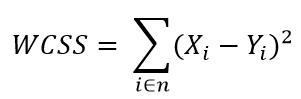

To measure the distance between data points and centroid, we can use any method such as Euclidean distance or Manhattan distance.
To find the optimal value of clusters, the elbow method follows the below steps:

* It executes the K-means clustering on a given dataset for different K values (ranges from 1-10).
* For each value of K, calculates the WCSS value.
* Plots a curve between calculated WCSS values and the number of clusters K.

The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.
Since the graph shows the sharp bend, which looks like an elbow, hence it is known as the **elbow** method.

So lets dive into the **problem**:

Lithion powers is the larget provider for the e-vehicals batteries. Drivers rent a Lithum ion battery typically for a day and then replace it with a charged battery from the company. Lithion has a variable pricing model based on driver's driving history. Battery life depends onfactors such as overspeeding, distance driven per day etc

Our objective her are two folds:
* create a cluster model where drivers can be grouped together based on their driving data.
* Group that datapoints so that drivers can be incentivized based on their clusters

Here we have a dataset which contains the drivers id, mean distance they cover daily and mean over speed precentage. For simplicity we will use only two features. Mean distance per day and mean over speed percentage.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/driver-dataset/driver-data.csv


In [2]:
df_ion=pd.read_csv("/kaggle/input/driver-dataset/driver-data.csv")
df_ion.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
#Lets check information about data.
df_ion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [4]:
#We will check for mean, std for both the feature.
df_ion.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


We can see that mean in both the features are far apart. Lets remember the assumumtion kmeans have. Kmeans assume that features have equal mean and equal variance

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Coverting mean_over_speed_perc into float.
df_ion['mean_over_speed_perc']= df_ion['mean_over_speed_perc'].astype(float)

In [7]:
#Checking data types
df_ion.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc    float64
dtype: object

In [8]:
#We already know using info we dont have null value this is another mmethod to check for null value.
df_ion.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

<AxesSubplot:xlabel='mean_over_speed_perc', ylabel='mean_dist_day'>

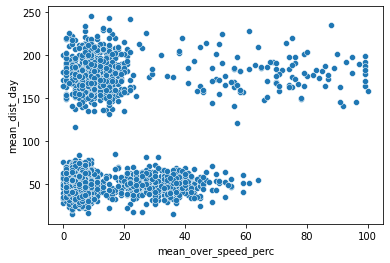

In [9]:
#Lets plot both feature using scatterplot
sns.scatterplot(x='mean_over_speed_perc', y='mean_dist_day', data=df_ion)

We can see in this plot itself we majorly have two cluster. First is centered around 50 mean_dist_day and other is around 175.

<AxesSubplot:xlabel='mean_dist_day', ylabel='Count'>

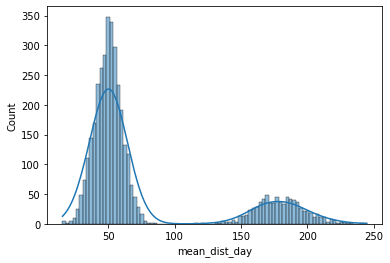

In [10]:
sns.histplot(x=df_ion['mean_dist_day'], kde=True)

<AxesSubplot:xlabel='mean_over_speed_perc', ylabel='Count'>

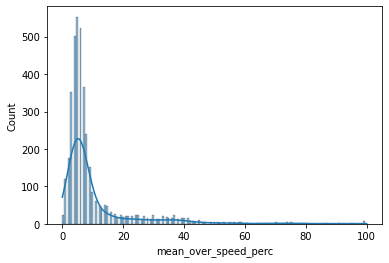

In [11]:
sns.histplot(x=df_ion['mean_over_speed_perc'], kde=True)

In [12]:
feature=df_ion.drop('id',axis=1)

In [13]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=2)
kmeans.fit(feature)

KMeans(n_clusters=2)

In [14]:
#We will use the command cluster_centers to determine the cluster_center vectors
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [15]:
#We can check the kmeans labels and its length as well
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [16]:
#We have 4000 rows in our data and now we have 4000 labels to go with it
#Now lets check how many unique drivers we have in cluster 1 and 2
unique,counts= np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 3200, 1: 800}


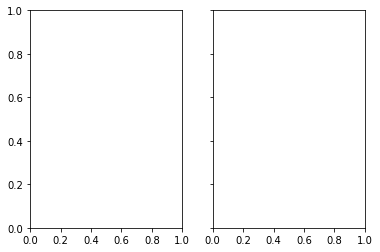

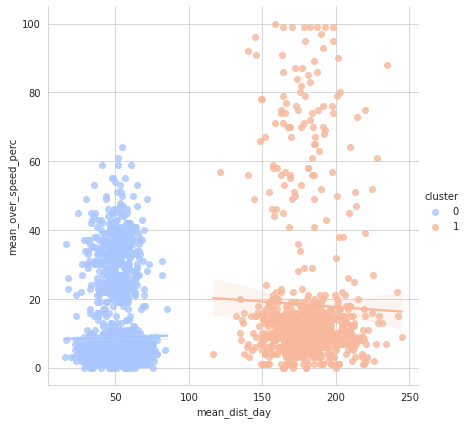

In [17]:
#Now lets save the labels with our feature data
feature['cluster']=kmeans.labels_

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc', data=feature, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg=True)

In [18]:
#Lets try it with 4 clusters
kmeans= KMeans(n_clusters=4)
kmeans.fit(feature)

KMeans(n_clusters=4)

In [19]:
kmeans.cluster_centers_

array([[ 4.99926325e+01,  5.20447169e+00,  1.83186799e-15],
       [ 1.80343118e+02,  1.05201149e+01,  1.00000000e+00],
       [ 5.04048244e+01,  3.23653396e+01, -1.55431223e-15],
       [ 1.77835096e+02,  7.02884615e+01,  1.00000000e+00]])

In [20]:
unique,counts= np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 2773, 1: 696, 2: 427, 3: 104}


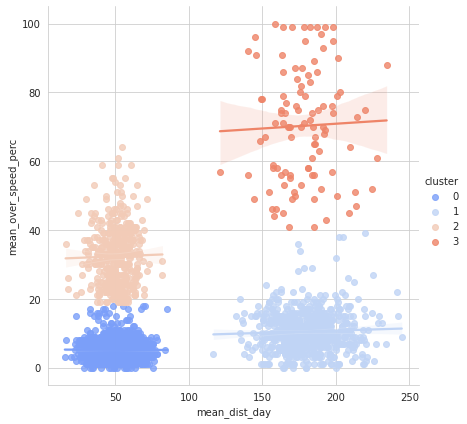

In [21]:
feature['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc', data=feature, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg=True)

With four clusters we can see drivers cluster much better. 
1. First cluster contains drivers who travel mean distance of 50 with 20% over speeding 
2. It contains drivers who travel from 150 to 200 per day with 20% over speeding.
3. drivers with mean distance 150 to 200 with more than 40 % over speeding.
4. drivers with mean distance 50 and overspeeding more than 20%

Lithion powers can now incentives drivers according to this cluster and set up their price accordingly.